ПРАКТИКУМ НА ЭВМ, РЕАЛИЗАЦИЯ НА PYTHON

Загрузим нужные библиотеки и данные по классификации цен на телефоны

In [512]:
import pandas as pd
import numpy as np
import statsmodels
import scipy as sp
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
df = pd.read_csv("test.csv")

Проверяем, что все работает

In [457]:
#print(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

1 РЕАЛИЗОВАТЬ АППРОКСИМАЦИЮ РАСПРЕДЕЛЕНИЙ ДАННЫХ С ПОМОЩЬЮ ЯДЕРНЫХ ОЦЕНОК

Апроксимируем распределение данных о емкости батареи телефонов c учетом наличия 4G и bluetooth с помощью KDE

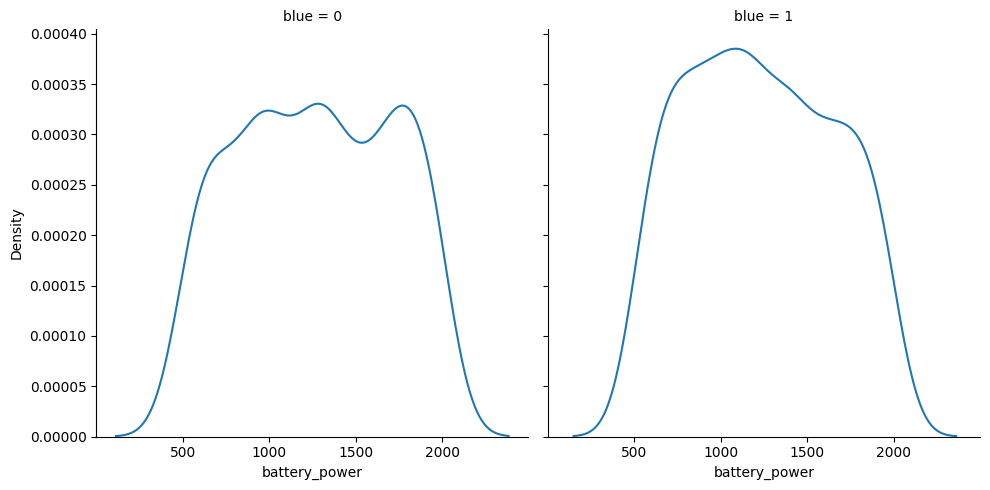

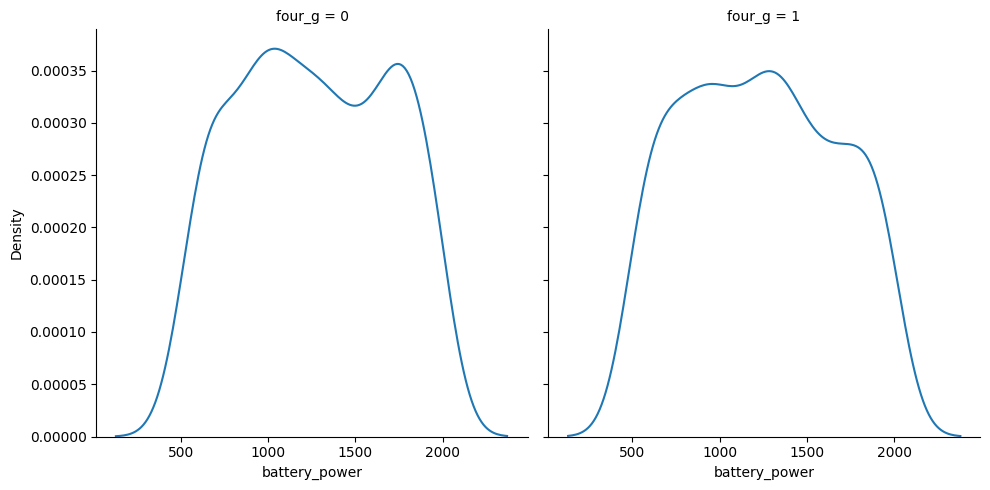

In [458]:
df = pd.read_csv("test.csv")
sns.displot(x = 'battery_power', kind = 'kde', col = 'blue', data = df)
sns.displot(x = 'battery_power', kind = 'kde', col = 'four_g', data = df)

3 ПРОВЕРИТЬ, ЯВЛЯЮТСЯ ЛИ НАБЛЮДЕНИЯ ВЫБРОСАМИ С ТОЧКИ ЗРЕНИЯ
ФОРМАЛЬНЫХ СТАТИСТИЧЕСКИХ КРИТЕРИЕВ ГРАББСА И Q-ТЕСТА ДИКСОНА.
ВИЗУАЛИЗИРОВАТЬ РЕЗУЛЬТАТЫ


Загрузим данные о ценах на жилье в Бостоне

In [459]:
from sklearn.datasets import load_boston
bos_hou = load_boston()
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head(5)

c:\Users\rds29\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Построим график уровеня преступности на душу населения по городам:

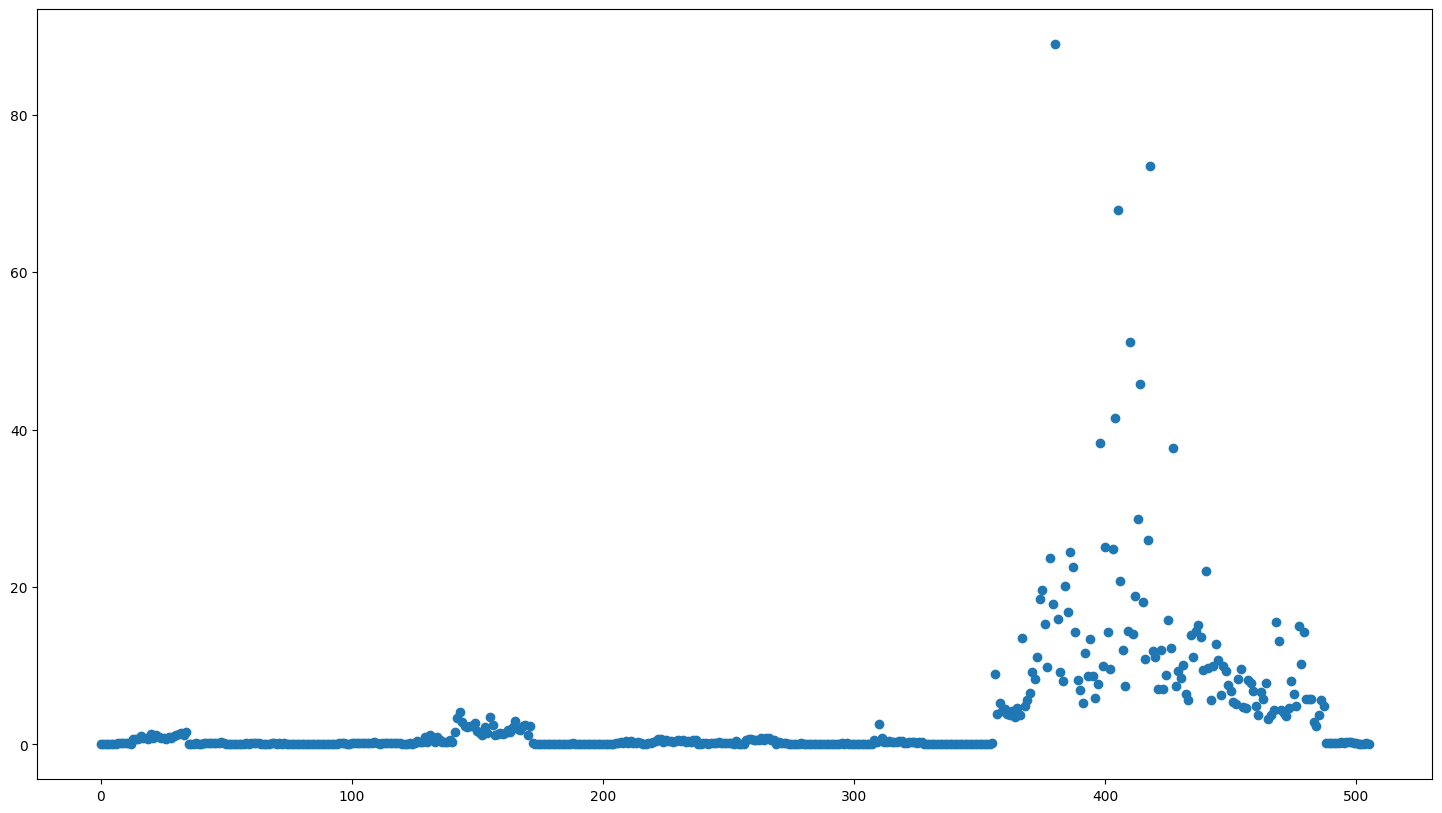

In [460]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston.index, df_boston['CRIM'])
plt.show()

Видим, что данные имеют довольно большие выбросы на элементах с индексами 360-480. Найдем эти выбросы с помощью критериев Граббса:

In [461]:
data1 = np.array(df_boston['CRIM'])
from outliers import smirnov_grubbs as grubbs
indexes = grubbs.max_test_indices(data1, alpha = 0.05)
value = grubbs.max_test_outliers(data1, alpha = 0.05)
print('Indexes:', indexes)
print('Value:', value)

Indexes: [380, 418, 405, 410, 414, 404, 398, 427, 413, 417, 400, 403, 386, 378, 387, 440, 406, 384, 375, 412, 374, 415, 379, 385]
Value: [88.9762, 73.5341, 67.9208, 51.1358, 45.7461, 41.5292, 38.3518, 37.6619, 28.6558, 25.9406, 25.0461, 24.8017, 24.3938, 23.6482, 22.5971, 22.0511, 20.7162, 20.0849, 19.6091, 18.811, 18.4982, 18.0846, 17.8667, 16.8118]


Теперь избавимся от них, заменив их значения на медианное

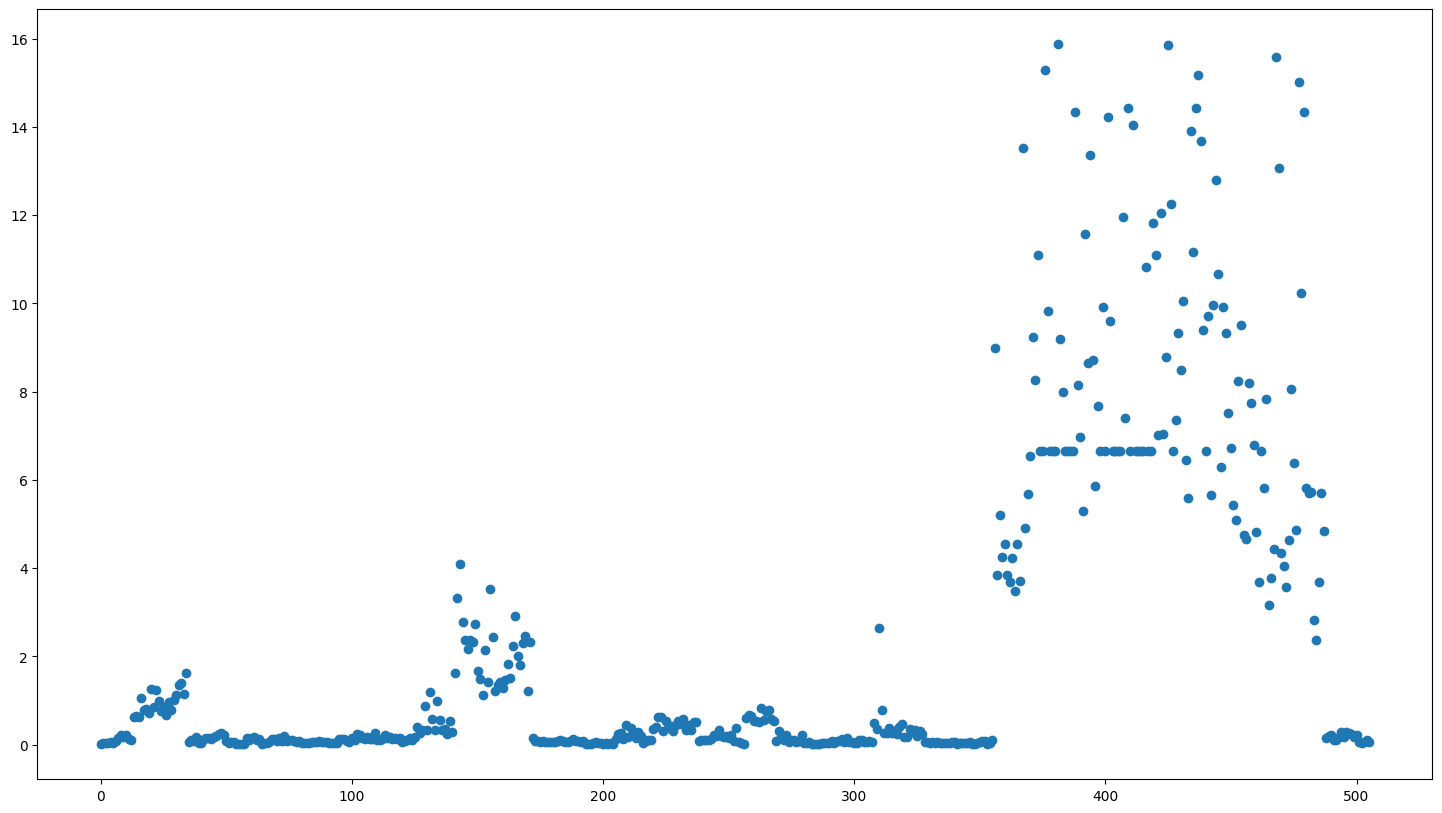

In [462]:
df_bostonNew = df_boston.copy()
for i in indexes:
    df_bostonNew['CRIM'][i] = np.median(df_boston)
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_bostonNew.index, df_bostonNew['CRIM'])
plt.show()

Как мы видим, от выбрасов мы избавились

4 ВОСПОЛЬЗОВАТЬСЯ ИНСТРУМЕНТАМИ ДЛЯ ЗАПОЛНЕНИЯ ПРОПУСКОВ В
ДАННЫХ. ПРОПУСКИ ВНЕСТИ ВРУЧНУЮ И СРАВНИТЬ РЕЗУЛЬТАТЫ ЗАПОЛНЕНИЯ С
ИСТИННЫМИ ЗНАЧЕНИЯМИ

Будем работать с данными по классифифкации телефонов. Предположим, мы хотим исследовать зависимость скорости микропроцессора от количества ядер процессора с помощью коэффициента корреляции Пирсона. Загрузим данные и внесем пропуски вручную

In [463]:
data = pd.read_csv("test.csv")
data = data[['clock_speed', 'n_cores']]
truedata = data.copy()
for i in range(1, 1000, 2):
    data['clock_speed'][i] = None
for j in range(0, 1000, 3):
    data['n_cores'][j] = None
data

C:\Users\rds29\AppData\Local\Temp\ipykernel_13380\3931641444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clock_speed'][i] = None


,clock_speed,n_cores
0,1.8,NaN
1,NaN,5.0
2,2.8,3.0
3,NaN,NaN
4,1.4,6.0
...,...,...
995,NaN,7.0
996,1.8,NaN
997,NaN,1.0
998,0.5,2.0


Получили данные о 1000 телефонах с пропусками в 50% и 33% данных для clock_speed и n_cores соответственно. Поскольку мы хотим посчитать коэффициент корреляции между ними, логичным будет заполнить пропуски средним значением оставшихся данных.

In [464]:
data['clock_speed'].fillna(data['clock_speed'].mean(), inplace = True)
data['n_cores'].fillna(data['n_cores'].mean(), inplace = True)
data

,clock_speed,n_cores
0,1.8000,4.310811
1,1.5178,5.000000
2,2.8000,3.000000
3,1.5178,4.310811
4,1.4000,6.000000
...,...,...
995,1.5178,7.000000
996,1.8000,4.310811
997,1.5178,1.000000
998,0.5000,2.000000


И посчитаем коэффициент корреляции

In [465]:
print(np.corrcoef(data['clock_speed'], data['n_cores']))
print(np.corrcoef(truedata['clock_speed'], truedata['n_cores']))


[[1.         0.01346064]
 [0.01346064 1.        ]]
[[ 1.         -0.01224692]
 [-0.01224692  1.        ]]


Получаем коэффициент корреляции равный 0.01, что говорит о некоррелируемости данных. Это вполне соответствует коэффициенту корреляции изначальных данных, равному -0.01, который тоже указывает на некоррелируемость данных

5 СГЕНЕРИРОВАТЬ ДАННЫЕ ИЗ НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ С РАЗЛИЧНЫМИ
ПАРАМЕТРАМИ И ПРОВЕСТИ АНАЛИЗ С ПОМОЩЬЮ ГРАФИКОВ ЭМПИРИЧЕСКИХ ФУНКЦИЙ
РАСПРЕДЕЛЕНИЙ, КВАНТИЛЕЙ, МЕТОДА ОГИБАЮЩИХ, А ТАКЖЕ СТАНДАРТНЫХ ПРОЦЕДУР
ПРОВЕРКИ ГИПОТЕЗ О НОРМАЛЬНОСТИ (КРИТЕРИИ КОЛМОГОРОВА-СМИРНОВА, ШАПИРОУИЛКА, АНДЕРСОНА-ДАРЛИНГА, КРАМЕРА ФОН МИЗЕСА, КОЛМОГОРОВА-СМИРНОВА В
МОДИФИКАЦИИ ЛИЛЛИЕФОРСА И ШАПИРО-ФРАНСИЯ). РАССМОТРЕТЬ ВЫБОРКИ МАЛОГО
(НЕ БОЛЕЕ 50-100 ЭЛЕМЕНТОВ) И УМЕРЕННОГО (1000-5000 НАБЛЮДЕНИЙ) ОБЪЕМОВ.

Итак, сгенерируем данные из нормального распределения

In [494]:
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(5, 10, 100)
data4 = np.random.normal(5, 10, 1000)

data100 = pd.DataFrame({'(0,1)': data1, '(5,10)': data3 })
data1000 = pd.DataFrame({'(0,1)': data2, '(5,10)': data4 })
data100


,"(0,1)","(5,10)"
0,1.961440,-2.072361
1,1.018139,15.451368
2,-0.591696,17.955955
3,0.064050,3.517389
4,-0.341348,19.276743
...,...,...
95,-0.053403,5.255245
96,0.533582,12.456699
97,-0.068527,5.803671
98,-0.575069,-3.612026


Теперь построим их эмпирические функции распределения

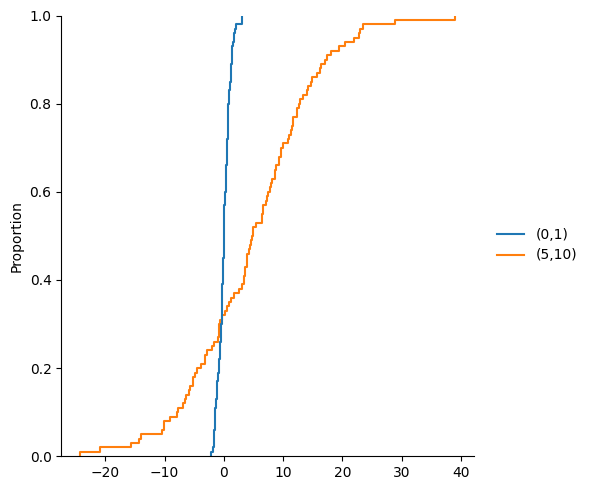

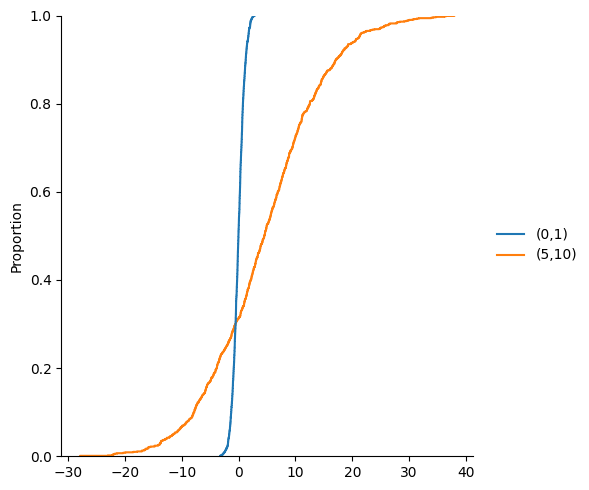

In [467]:
sns.displot(kind = 'ecdf', data = data100)
sns.displot(kind = 'ecdf', data = data1000)

Из этих графиков видно, что данные действительно принадлежат нормальным распределениям с параметрами (0,1) и (5,10) и что при увеличении выборки эмпирическая функция распредления становится более гладкой

Теперь найдем 0, 0.25, 0.5, 0.75 и 1 -квантили для наших данных

In [468]:
q = [0, 0.25, 0.5, 0.75, 1.0]
q1 = data100['(0,1)'].quantile(q)
q2 = data100['(5,10)'].quantile(q)
q3 = data1000['(0,1)'].quantile(q)
q4 = data1000['(5,10)'].quantile(q)
print(pd.DataFrame([q1, q2, q3, q4]))

             0.00      0.25      0.50       0.75       1.00
(0,1)   -2.094381 -0.617165  0.049923   0.689799   3.132030
(5,10) -24.253050 -1.785549  4.852194  11.491110  39.043023
(0,1)   -3.260615 -0.695934 -0.045238   0.605314   2.821789
(5,10) -27.948584 -2.111443  4.511039  10.626309  37.985405


И построим график квантилей

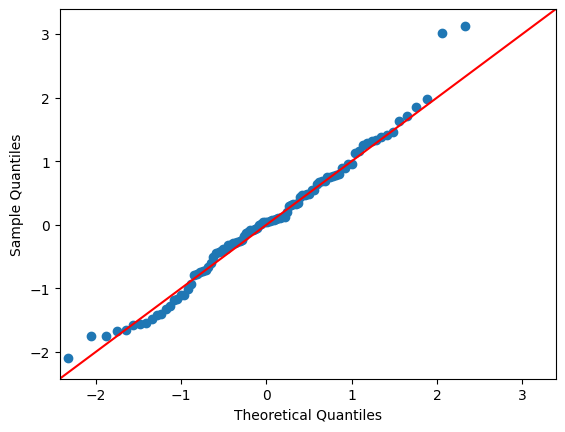

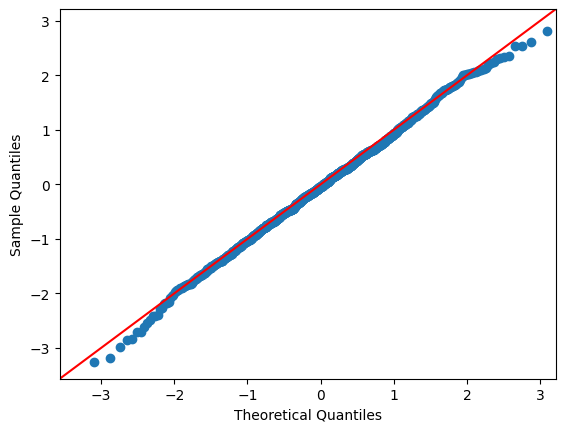

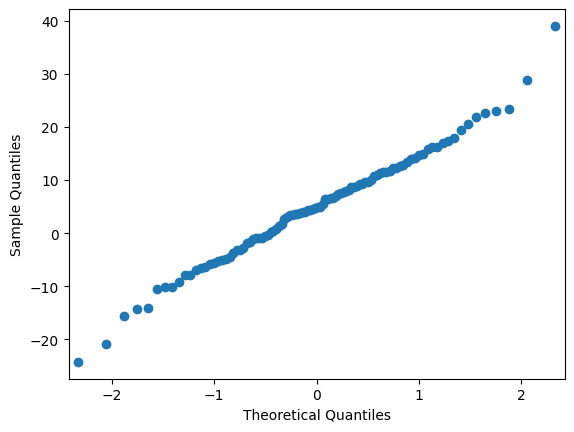

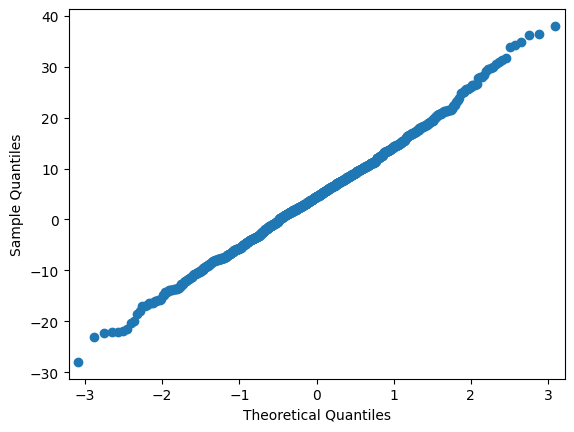

In [469]:
fig = statsmodels.graphics.gofplots.qqplot(data1, line = '45')
fig = statsmodels.graphics.gofplots.qqplot(data2, line = '45')
fig = statsmodels.graphics.gofplots.qqplot(data3)
fig = statsmodels.graphics.gofplots.qqplot(data4)
plt.show()

Можно заметить, что на более больших выборках, например, 0.5-квантиль более точно отражает суть происходящего, так как он ближе к мат ожиданию, нежели на маленькой выборке, а 0-квантиль и 1-квантиль, наоборот, так как они по сути являются выбросами

Проверим принадлежность данных к нормальному распределению с помощью критерия Колмогорова-Смирнова с уровнем доверия 0.95

In [470]:
from scipy.stats import kstest
statistic, pvalue = kstest(data1, 'norm')
print('Для data1')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

statistic, pvalue = kstest(data2, 'norm')
print('Для data2')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

statistic, pvalue = kstest(data3, 'norm', args = (5,10))
print('Для data3')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0', pvalue)

statistic, pvalue = kstest(data4, 'norm', args = (5,10))
print('Для data4')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0', pvalue)


Для data1
Принимаем H0
Для data2
Принимаем H0
Для data3
Принимаем H0
Для data4
Принимаем H0


Теперь проверим принадлежность данных к нормальному распределению с помощью критерия Шапиро-Уилка с уровнем доверия 0.95

In [471]:
from scipy.stats import shapiro
statistic, pvalue = shapiro(data1)
print('Для data1')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0, pvalue = ', pvalue)

statistic, pvalue = shapiro(data2)
print('Для data2')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

statistic, pvalue = shapiro(data3)
print('Для data3')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

statistic, pvalue = shapiro(data4)
print('Для data4')
if pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

Для data1
Принимаем H0
Для data2
Принимаем H0
Для data3
Принимаем H0
Для data4
Принимаем H0


Как мы видим, критерий Шапиро-Уилка плохо работает для маленьких выборок, но в остальном указывает на нормальность данных

Теперь проверим принадлежность данных к нормальному распределению с помощью критерия Андерсона-Дарлинга с разными уровнями доверия

In [503]:
from scipy.stats import anderson
statistic, critical_values, significance_level = anderson(data1)
print('Для data1')
for i in range(4, -1, -1):
    if critical_values[i] > statistic:
        if i == 0:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[0] / 100)
            break
        else:
            continue
    else:
        if i == 4:
            print('Отвергаем H0, statistic = ', statistic)
            break
        else:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[i + 1] / 100)
            break

statistic, critical_values, significance_level = anderson(data2)
print('Для data2')
for i in range(4, -1, -1):
    if critical_values[i] > statistic:
        if i == 0:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[0] / 100)
            break
        else:
            continue
    else:
        if i == 4:
            print('Отвергаем H0, statistic = ', statistic)
            break
        else:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[i + 1] / 100)
            break

statistic, critical_values, significance_level = anderson(data3)
print('Для data3')
for i in range(4, -1, -1):
    if critical_values[i] > statistic:
        if i == 0:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[0] / 100)
            break
        else:
            continue
    else:
        if i == 4:
            print('Отвергаем H0, statistic = ', statistic)
            break
        else:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[i + 1] / 100)
            break

statistic, critical_values, significance_level = anderson(data4)
print('Для data4')
for i in range(4, -1, -1):
    if critical_values[i] > statistic:
        if i == 0:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[0] / 100)
            break
        else:
            continue
    else:
        if i == 4:
            print('Отвергаем H0, statistic = ', statistic)
            break
        else:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[i + 1] / 100)
            break


Для data1
Принимаем H0 с уровнем доверия alpha =  0.15
Для data2
Принимаем H0 с уровнем доверия alpha =  0.05
Для data3
Принимаем H0 с уровнем доверия alpha =  0.15
Для data4
Отвергаем H0, statistic =  1.3043131451521504


В данном случае критерий принимает гипотезу H0 о нормальности для всех данных, кроме последнего, где он отвергает нулевую гипотезу

Теперь проверим принадлежность данных к нормальному распределению с помощью критерия Крамера фон Мизоса с уровнем доверия 0.95

In [473]:
from scipy.stats import cramervonmises
res = cramervonmises(data1, 'norm')
print('Для data1')
if res.pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

res = cramervonmises(data2, 'norm')
print('Для data2')
if res.pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

res = cramervonmises(data3, 'norm', args = (5,10))
print('Для data3')
if res.pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0')

res = cramervonmises(data4, 'norm', args = (5,10))
print('Для data4')
if res.pvalue > 0.05:
    print('Принимаем H0')
else:
    print('Отвергаем H0') 

Для data1
Принимаем H0
Для data2
Принимаем H0
Для data3
Принимаем H0
Для data4
Принимаем H0


Видно, что во всех 4 случаях критерий Крамера фон Мизоса не отвергает нулевую гипотезу о нормальности данных

6 ПРОДЕМОНСТРИРОВАТЬ ПРИМЕР АНАЛИЗА ДАННЫХ С ПОМОЩЬЮ ГРАФИКОВ
КВАНТИЛЕЙ, МЕТОДА ОГИБАЮЩИХ, А ТАКЖЕ СТАНДАРТНЫХ ПРОЦЕДУР ПРОВЕРКИ ГИПОТЕЗ
О НОРМАЛЬНОСТИ. РАССМОТРЕТЬ ВЫБОРКИ МАЛОГО И УМЕРЕННОГО ОБЪЕМОВ.

Загрузим два датасета размером 500 и 59000 наблюдений

In [504]:
data = pd.read_csv('BMI.csv')
data1 = pd.read_csv('Final_Dataset.csv')
print(data.tail(5))
print(data1.tail(5))

     Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5
               id     sex  age        BMI
59347  Y25362.png    Male   34  24.232947
59348  Y25363.png    Male   33  23.706161
59349  Y25364.png  Female   47  20.481589
59350  Y25365.png  Female   27  27.983691
59351  Y25366.png    Male   70  34.451020


Построим для них QQ графики и проведем стандартные процедуры проверки гипотез о нормальности для распределния роста в первых данных и для распредления индекса массы тела для вторых данных

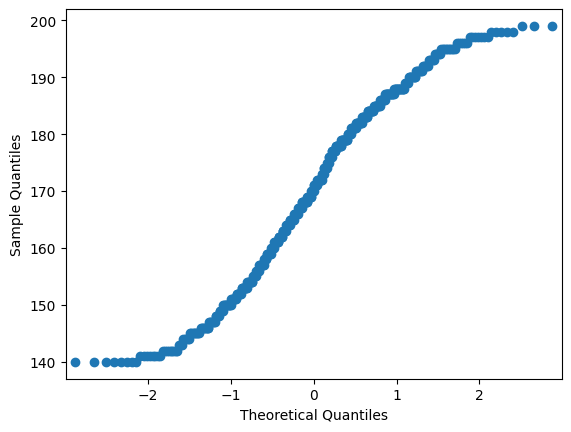

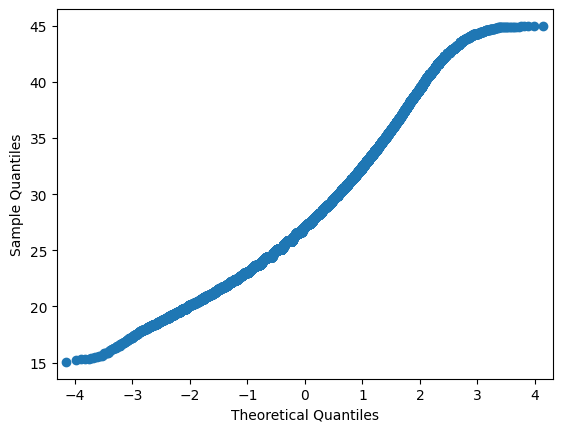

In [505]:
fig = statsmodels.graphics.gofplots.qqplot(data['Height'])
fig = statsmodels.graphics.gofplots.qqplot(data1['BMI'])
plt.show()

In [506]:
from scipy.stats import shapiro
from scipy.stats import cramervonmises
from scipy.stats import anderson

statistic, pvalue = shapiro(data['Height'])
print('Для данных о росте по критерию Шапиро-Уилка')
if pvalue > 0.05:
    print('Принимаем H0 с уровнем доверия 0.95')
else:
    print('Отвергаем H0 при уровне доверия 0.95, pvalue = ', pvalue)

res = cramervonmises(data['Height'], 'norm')
print('Для данных о росте по критерию Крамера фон Мизеса')
if res.pvalue > 0.05:
    print('Принимаем H0 с уровнем доверия 0.95')
else:
    print('Отвергаем H0 при уровне доверия 0.95, pvalue = ', res.pvalue)



Для данных о росте по критерию Шапиро-Уилка
Отвергаем H0 при уровне доверия 0.95, pvalue =  2.666284970587185e-10
Для данных о росте по критерию Крамера фон Мизеса
Отвергаем H0 при уровне доверия 0.95, pvalue =  0


In [510]:
res = cramervonmises(data1['BMI'], 'norm')
print('Для данных об индексе массы тела по критерию Крамера фон Мизеса')
if res.pvalue > 0.05:
    print('Принимаем H0 с уровнем доверия 0.95')
else:
    print('Отвергаем H0 при уровне доверия 0.95, pvalue = ', res.pvalue)

statistic, critical_values, significance_level = anderson(data1['BMI'])
print('Для данных об индексе массы тела по критерию Андерсона-Дарлинга')
for i in range(4, -1, -1):
    if critical_values[i] > statistic:
        if i == 0:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[0] / 100)
            break
        else:
            continue
    else:
        if i == 4:
            print('Отвергаем H0, statistic = ', statistic)
            break
        else:
            print('Принимаем H0 с уровнем доверия alpha = ', significance_level[i + 1] / 100)
            break

Для данных об индексе массы тела по критерию Крамера фон Мизеса
Отвергаем H0 при уровне доверия 0.95, pvalue =  0
Для данных об индексе массы тела по критерию Андерсона-Дарлинга
Отвергаем H0, statistic =  450.7215480820523


Исходя из полученных данных можно сделать вывод, что у нас недостаточно данных для того, чтобы полагать, что данные о росте и об индексе массы тела подлежат закону нормального распредления

7 ПРОДЕМОНСТРИРОВАТЬ ПРИМЕНЕНИЕ ДЛЯ ПРОВЕРКИ РАЗЛИЧНЫХ ГИПОТЕЗ И
РАЗЛИЧНЫХ ДОВЕРИТЕЛЬНЫХ УРОВНЕЙ (0.9, 0.95, 0.99) СЛЕДУЮЩИХ КРИТЕРИЕВ:

a) Пусть у нас есть данные по классификации телефонов

In [246]:
data = pd.read_csv('test.csv')
data.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


Мы хотим сравнить средние значения оперативной памяти (RAM) для телефонов, которые имеют 3G и не имеют. Для этого воспользуемся критерием Стьюдента, и если p_value будет больше уровня знначимости, то гипотезу H0 будет принимать, если меньше - отвергать

Загрузим библиотеки и отберем данные

In [256]:
from numpy.random import randn
from scipy.stats import ttest_ind
data1 = data['ram'].where(data['three_g'] == 0).dropna()
data2 = data['ram'].where(data['three_g'] == 1).dropna()

И начнем проверку

Двусторонний критерий, гипотеза H0: Средние двух выборок равны, альтернативная гипотеза - не равны, уровень значимости - 0.95

In [254]:
stat, p = ttest_ind(data1, data2)
alpha = 0.05 
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.34792455615560636
Принять H0


Двусторонний критерий, гипотеза H0: Средние двух выборок равны, альтернативная гипотеза - не равны, уровень значимости - 0.9

In [259]:
stat, p = ttest_ind(data1, data2)
alpha = 0.1 
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.34792455615560636
Принимаем гипотезу H0


Двусторонний критерий, гипотеза H0: Средние двух выборок равны, альтернативная гипотеза - не равны, уровень значимости - 0.99

In [261]:
stat, p = ttest_ind(data1, data2)
alpha = 0.01
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.34792455615560636
Принимаем гипотезу H0


Односторонний критерий (меньше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.95

In [262]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.05 
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.17396227807780318
Принимаем гипотезу H0


Односторонний критерий (меньше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.9

In [263]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.1
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.17396227807780318
Принимаем гипотезу H0


Односторонний критерий (меньше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.99

In [264]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.01
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.17396227807780318
Принимаем гипотезу H0


Односторонний критерий (больше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.95

In [265]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.05 
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.8260377219221968
Принимаем гипотезу H0


Односторонний критерий (больше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.9

In [266]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.1
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.8260377219221968
Принимаем гипотезу H0


Односторонний критерий (больше), Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше, уровень значимости - 0.99

In [267]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.01
print('p_value:', p)
if p > alpha:
  print('Принимаем гипотезу H0')
else:
  print('Отвергаем гипотезу H0')

p_value: 0.8260377219221968
Принимаем гипотезу H0


b) Пусть мы имеем данные о среднем расходе топлива на 10 киллометров для 10 разных автомобилей и двух типов бензина - 90 и 95

In [268]:
benz90 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24]
benz95 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27]

И мы хотим проверить нулевую гипотезу H0 "расход топлива для обоих видов бензина одинаковый" против альтернативы H1 "расход топлива для обоих видов бензина разный". Для этого воспользуемся знаковым ранговым тестом Уилкоксона

In [274]:
import scipy.stats as stats
statistic, pvalue = stats.wilcoxon(benz90, benz95)
print(statistic, pvalue)

6.0 0.04940018799120363


В данном случае значение pvalue плучилось равным 0.049, откуда можно сделать вывод, что при уровне значимости 0.95 и 0.9 мы должны будем отвергунть нулевую гипотезу H0, а при уровне значимости 0.99 - нет

Теперь для тех же экспериментальных данных и тех же гипотез проверим результат критерием Манн-Уитни:

In [275]:
stats.mannwhitneyu(benz90, benz95, alternative='two-sided')

MannwhitneyuResult(statistic=34.0, pvalue=0.23794062852907327)

Получили значение pvalue равное 0.24, откуда делаем вывод, что при доверительных уровнях 0.9, 0.95 и 0.99 мы не можем отвергнуть гипотезу H0, то есть у нас нет веских причин полагать, что разница между видами бензина существенная

с) Предположим, мы проводим эксперимент над тремя группами растений по 10 объектов в каждой. Для эксперимента нам важно, чтобы дисперсии распределений в каждой группе были одинаковыми. Проверим это с помощью тестов Фишера, Левене, Бартлетта, Флигнера-Килина:

In [276]:
group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

In [285]:
from scipy.stats import f
statistic, pvalue = stats.levene(group1, group2, group3, center = 'mean')
for i in {0.05, 0.01, 0.1}:
    if pvalue > alpha:
        print('Для alpha = ', 1 - i, ' Принимаем гипотезу H0')
    else:
        print('Для alpha = ', 1 - i, 'Отвергаем гипотезу H0')

Для alpha =  0.95  Принимаем гипотезу H0
Для alpha =  0.9  Принимаем гипотезу H0
Для alpha =  0.99  Принимаем гипотезу H0


In [286]:
from scipy.stats import f
statistic, pvalue = stats.bartlett(group1, group2, group3)
for i in {0.05, 0.01, 0.1}:
    if pvalue > alpha:
        print('Для alpha = ', 1 - i, ' Принимаем гипотезу H0')
    else:
        print('Для alpha = ', 1 - i, 'Отвергаем гипотезу H0')

Для alpha =  0.95  Принимаем гипотезу H0
Для alpha =  0.9  Принимаем гипотезу H0
Для alpha =  0.99  Принимаем гипотезу H0


In [287]:
from scipy.stats import f
statistic, pvalue = stats.fligner(group1, group2, group3, center = 'mean')
for i in {0.05, 0.01, 0.1}:
    if pvalue > alpha:
        print('Для alpha = ', 1 - i, ' Принимаем гипотезу H0')
    else:
        print('Для alpha = ', 1 - i, 'Отвергаем гипотезу H0')

Для alpha =  0.95  Принимаем гипотезу H0
Для alpha =  0.9  Принимаем гипотезу H0
Для alpha =  0.99  Принимаем гипотезу H0


Как мы видим, все тест для любых уровней значимости показали, что нет причин отвергать гипотезу H0, откуда делаем вывод что отклонение во всех трех группах одинаковое

8 ИССЛЕДОВАТЬ КОРРЕЛЯЦИОННЫЕ ВЗАИМОСВЯЗИ В ДАННЫХ С ПОМОЩЬЮ
 КОЭФФИЦИЕНТОВ КОРРЕЛЯЦИИ ПИРСОНА, СПИРМЕНА И КЕНДАЛЛА


Исследуем корреляционные связи с помощью коэффициента Пирсона

In [37]:
print(np.corrcoef(df['fc'], df['four_g']))
print(np.corrcoef(df['three_g'], df['four_g']))
print(np.corrcoef(df['battery_power'], df['four_g']))

[[1.        0.0328322]
 [0.0328322 1.       ]]
[[1.         0.55352828]
 [0.55352828 1.        ]]
[[ 1.         -0.04252006]
 [-0.04252006  1.        ]]


Отсюда видим, что количество мегапиксилей на фронтальной камере телефона с наличием 4G, как и емкость батареи телефона с наличием 4G не коррелириют, в то время как наличие 3G и 4G имеют умеренную положительную корреляцию, тк коэффициент корреляции Пирсона для них примерно равен 0.55

Теперь посчитаем коэффициенты Спирмана и Кендалла для двух пар искусственно созданных выборки, в одной из которых данные будут коррелировать друг с другом, а во второй - нет

Создаем тестовые выборки

In [429]:
np.random.seed(1)
datacorr1 = np.random.rand(1000) * 20
datacorr2 = datacorr1 + (np.random.rand(1000) * 10)

dataNotCorr1 = np.random.rand(1000) * 20
dataNotCorr2 = np.random.rand(1000) * 10

print(datacorr1)

[8.34044009e+00 1.44064899e+01 2.28749635e-03 6.04665145e+00
 2.93511782e+00 1.84677190e+00 3.72520423e+00 6.91121454e+00
 7.93534948e+00 1.07763347e+01 8.38389029e+00 1.37043900e+01
 4.08904499e+00 1.75623487e+01 5.47751864e-01 1.34093502e+01
 8.34609605e+00 1.11737966e+01 2.80773877e+00 3.96202978e+00
 1.60148914e+01 1.93652315e+01 6.26848356e+00 1.38464523e+01
 1.75277830e+01 1.78921333e+01 1.70088423e+00 7.81095665e-01
 3.39660839e+00 1.75628501e+01 1.96693668e+00 8.42215250e+00
 1.91577906e+01 1.06633057e+01 1.38375423e+01 6.31031262e+00
 1.37300186e+01 1.66925134e+01 3.65765547e-01 1.50028863e+01
 1.97772218e+01 1.49633131e+01 5.60887984e+00 1.57855866e+01
 2.06452013e+00 8.95787052e+00 1.81719101e+01 5.87228297e+00
 5.75550677e+00 2.60057144e+00 3.87339157e-01 1.35767107e+01
 4.23256232e+00 5.31093319e+00 9.83146319e+00 1.06725090e+00
 1.14823521e+01 2.93457150e+00 1.17861107e+01 1.39951672e+01
 2.04668858e+00 8.28111976e+00 1.38880032e+01 8.28358539e+00
 9.99069179e-01 1.071792

Считаем коэффициент Спирмана

In [47]:
coefSpearman, p = sp.stats.spearmanr(datacorr1, datacorr2)
coefSpearman1, p1 = sp.stats.spearmanr(dataNotCorr1, dataNotCorr2)
print(coefSpearman)
print(coefSpearman1)

0.900003924003924
-0.020656604656604658


Для первого случая получили коэффициент Спирмана равным 0.9, что соответствует сильной положительной корреляции, а для второго случая коэффициент Спирмана равен -0.02, откуда делаем вывод, что при гипотезе Н0 о коррелируемости данных в первом случае эксперементальные данные не противоречат нулевой гипотезе, а во втором ее надо отвергнуть

Считаем коэффициент Кендалла

In [48]:
coefKendall, p = sp.stats.kendalltau(datacorr1, datacorr2)
coefKendall1, p1 = sp.stats.kendalltau(dataNotCorr1, dataNotCorr2)
print(coefKendall)
print(coefKendall1)

0.7093733733733734
-0.013733733733733733


Для первого случая получили коэффициент Кендалла равным 0.7, что соответствует сильной положительной корреляции, а для второго случая коэффициент Кендалла равен -0.01, откуда можно сделать вывод, что при гипотезе Н0 о некоррелируемости данных в первому случае эксперементальные данные не противоречат нулевой гипотезе, а во втором гипотезу надо отвергнуть

9 ПРОДЕМОНСТРИРОВАТЬ ИСПОЛЬЗОВАНИЕ МЕТОДОВ ХИ-КВАДРАТ, ТОЧНОГО
ТЕСТА ФИШЕРА, ТЕСТА МАКНЕМАРА, КОХРАНА-МАНТЕЛЯ-ХЕНЗЕЛЯ.

Предположим мы имеем данные о посещяемости пивного магазина:

Понедельник: 50 клиентов
вторник: 60 клиентов
Среда: 40 клиентов
Четверг: 47 клиентов
Пятница: 53 клиента

Проверим гипотезу H0 о том, что ежедневно магазин посещает одинаковое количество людей. Для этого создадм два массива с наблюдаемыми и преполагаемыми данными и воспользуемся критерием хи-квадрат для проверки это гипотезы

4.359999999999999 0.3594720674366307
9.487729036781154


In [ ]:
import scipy.stats as stats
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]
n = len(expected)
alfa = 0.05
statistic, pvalue = stats.chisquare(observed, expected)
print(statistic, pvalue)
print(stats.chi2.ppf(1 - alfa, n - 1))

Получаем значение статистики равное 4.36, что меньше критического значения (9.49) для хи-квадрат теста с 4 степенями сводобы и alfa = 0.05 . В таком случае принимаем нулевую гипотезу H0 и отвергаем альтернативу

Теперь предположим мы имеем информацию о ежедневной посещаемости спортивного комплекса в Саратове среди тех, у кого куплен абонемент: 2 женщин и 8 мужчин регулярно ходят в зал, и 7 женщин и 3 мужчин этого не делают. Построим нулевую гипотезу H0 о том, что связи между этими данными нет, и проверим ее с помощью точного теста Фишера

In [124]:
data = [[2, 8], [7, 3]]
odd_ratio, p_value = stats.fisher_exact(data)
print(odd_ratio)
print(p_value)

0.10714285714285714
0.06977851869492728


В данном случае, если принять уровень значимости за alfa = 0.05 , то мы принимаем нулевую гипотезу H0 и заключаем, что связи в классификации нет, так как p_value = 0.07 > alfa

Далее предположим, что мы проводим эксперемент, в котором мы хотим узнать, как определенный маркетинговый видеоролик повлияет на мнение об принятии определенного закона. Пусть мы имеем такие данные:

In [132]:
data = pd.DataFrame({'До просмотра': [30, 12], 'После просмотра': [40, 18]}, index = ['Поддержали', 'Не поддержали'])
data

,До просмотра,После просмотра
Поддержали,30,40
Не поддержали,12,18


Воспользуемся тестом Макнемара для проверки этой гипотезы

In [424]:
from statsmodels.stats.contingency_tables import mcnemar
data = [[30, 40], [12, 18]]
print(mcnemar(data, exact = False))

pvalue      0.00018095049043756332
statistic   14.01923076923077


Получаем значение pvalue = 0.0001, что при уровне значимости alfa = 0.05 будет говорить о том, что мы отвергаем нулевую гипотезу H0 и что доля людей, поддержавших закон до и после просмотра маркетингового видео, статистически значимо различалась

10 ПРОВЕРИТЬ НАЛИЧИЕ МУЛЬТИКОЛЛИНЕАРНОСТИ В ДАННЫХ С ПОМОЩЬЮ
КОРРЕЛЯЦИОННОЙ МАТРИЦЫ И ФАКТОРА ИНФЛЯЦИИ ДИСПЕРСИИ

Загрузим данные о росте, весе, поле и индексе массы тела для 500 человек

In [236]:
data = pd.read_csv('BMI.csv')
data.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


И исследуем мультиколлинеарности с помощью VIF (фактора инфляции дисперсии) в зависимости от индекса массы тела

In [237]:

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
X = data[['Gender', 'Height', 'Weight']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


Как можно видеть, значения vif для роста и веса имеют большие значения (больше 10), из чего следует, что эти две переменные сильно коррелируют, что вполне логично, ведь вес зависит от роста.

Теперь рассмотрим матрицу корреляции для этих же данных и визуализируем ее

In [243]:
mcorr = data.corr()
mcorr.style.background_gradient(cmap = 'coolwarm')

,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


Из нее видно, что вес и рост коррелируют с индексом массы тела сильно положительно и умеренно отрицатально соответственно, что наталкивает на мысль об мультиколлинеарности роста и веса

11 ИССЛЕДОВАТЬ ЗАВИСИМОСТИ В ДАННЫХ С ПОМОЩЬЮ ДИСПЕРСИОННОГО АНАЛИЗА

Создадим DataFrame на основе данных об успеваемости учащихся школ Португалии, чтобы исследовать зависимость успеваемости учащихся от их возраста с помощью дисперсионного анализа

In [36]:
df = pd.read_csv('student-mat.csv')

age = df[['age', 'G1']]
age16 = age[age['age'] == 16][:80]['G1']
age17 = age[age['age'] == 17][:80]['G1']
age18 = age[age['age'] == 18][:80]['G1']

data = pd.DataFrame({'Age16': np.array(age16), 'Age17': np.array(age17), 'Age18': np.array(age18)})
print(data)


    Age16  Age17  Age18
0       6      5      5
1      15      6      7
2      12      6      6
3      14      8      9
4      13      9      6
..    ...    ...    ...
75      9     16      7
76     12     14      6
77     12     11     10
78     11     10      6
79     15     14      7

[80 rows x 3 columns]


Получили данные об успеваемости 240 учеников, по 80 человек в каждой группе, где успеваемость оценивается по 20бальной шкале

По этим данным посчитаем F-тест с помощью функции f_oneway()

In [49]:
F, p = sp.stats.f_oneway(np.array(age16), np.array(age17), np.array(age18))
print(F, p)

0.04859155255259417 0.9525796126271127


Получили значение теста, равное 0.04859155255259417. С учетом параметров данных, F-статистика ведет себя как распределение Фишера с (2, 237) степенями свободы. Предположим, мы установили альфа, уровень значимости которого равен 5%. Соответствующее F-критическое значение составляет 3,68. Следовательно:

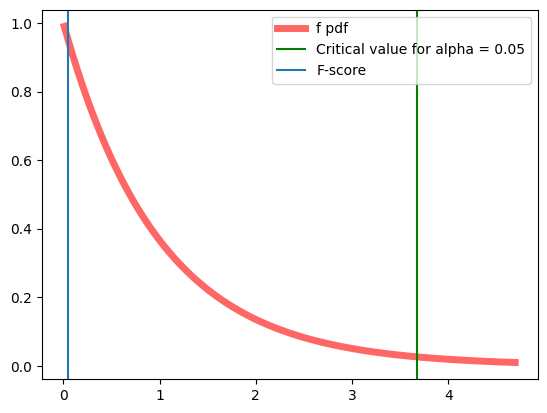

In [50]:
from scipy.stats import f
k = data.shape[1]
n = data.shape[0]
critical = 3.68
fig, ax = plt.subplots(1, 1)
dfn, dfd = k - 1, k * (n - 1)
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw = 5, alpha = 0.6, label = 'f pdf')
plt.axvline(x = critical, label = 'Critical value for alpha = 0.05', color = 'g')
plt.axvline(x = F, label = 'F-score')
plt.legend()

Откуда делаем вывод, что с уверенностью 0.95 нет существенной разницы между тремя возрастными группами

12 ПОДОГНАТЬ РЕГРЕССИОННЫЕ МОДЕЛИ (В ТОМ ЧИСЛЕ, НЕЛИНЕЙНЫЕ) К
ДАННЫМ, А ТАКЖЕ ОЦЕНИТЬ КАЧЕСТВО ПОДОБНОЙ АППРОКСИМАЦИИ.


Предположим, мы имеем данные о студентах, сдающих аттестационную работу. В первом столбце - количество часов, затраченное на работу, во втором - оценка по стобальной шкале


In [523]:
data = pd.DataFrame({'hours': [3, 4, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14], 
                   'score': [64, 66, 79, 75, 77, 85, 88, 85, 90, 94, 92, 95, 96, 97, 99]})
data.head()

,hours,score
0,3,64
1,4,66
2,4,79
3,5,75
4,5,77


Визуализируем эти данные с помощью диаграммы рассеяния

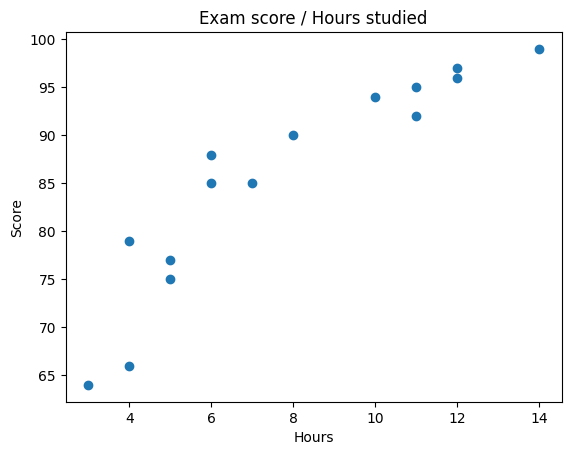

In [516]:
plt.scatter(data.hours, data.score)
plt.title('Exam score / Hours studied')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Теперь проверим данные на наличие выбросов

<AxesSubplot:>

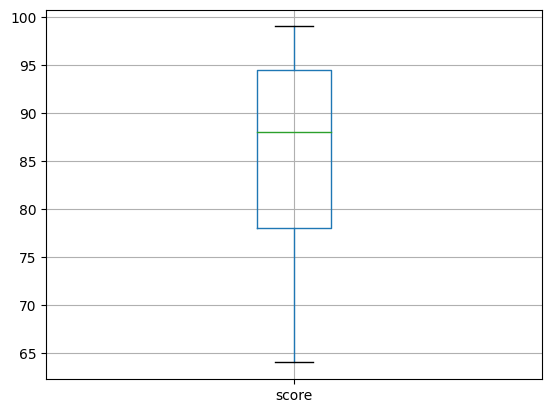

In [519]:
data.boxplot(column = ['score']) 

Теперь построим линейную регрессионную модель для этих данных

In [557]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = pd.DataFrame(data.hours)
y = pd.DataFrame(data.score)
model.fit(x, y)
print(model.coef_, model.intercept_
)

[[2.87183423]] [62.87490407]


И визуализируем ее

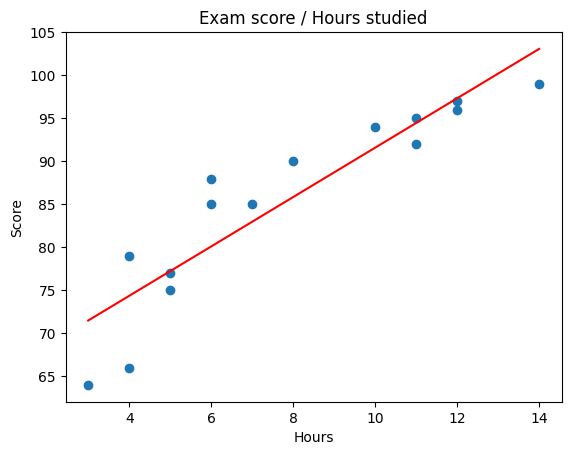

In [559]:
plt.scatter(data.hours, data.score)

plt.plot(x, model.predict(x), color = 'red')

plt.title('Exam score / Hours studied')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Теперь построим полиномиальную регрессионную модель и визуализируем ее

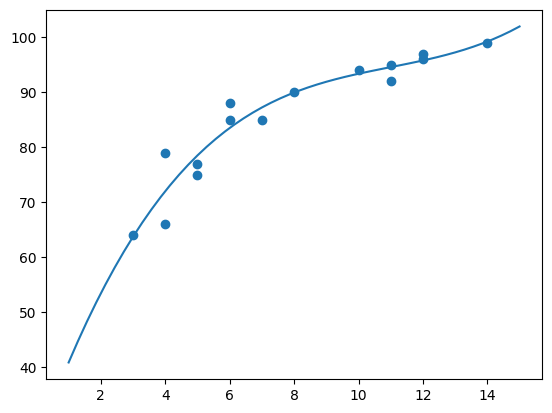

In [569]:
model = np.poly1d(np.polyfit(np.array(data.hours), np.array(data.score), 3))
polyline = np.linspace(1, 15)
plt.scatter(np.array(data.hours), np.array(data.score))
plt.plot(polyline, model(polyline))
plt.show() 

По обоим графикам видно, что в нашем случае данные намного лучше описываются нелинейной моделью регрессии, которая имеет вид

In [570]:
print(model)

         3         2
0.04215 x - 1.389 x + 16.43 x + 25.82
